Synthetic data

1500 instances - 0 or 1 - binary problem

class 1 3 Gaussian distribution - [6,14], [10,6][14,14]

class 0 - Uniform distribution - 20


In [190]:
import numpy as np

In [191]:
import matplotlib.pyplot as plt


In [192]:
#matplotlib inline

In [193]:
from numpy.random import random

In [194]:
N=1500

In [195]:
mean1=[6,14]

In [196]:
mean2=[10,6]

In [197]:
mean3=[14,14]

In [198]:
cov=[[3.5, 0],[0,3.5]]

In [199]:
cov

[[3.5, 0], [0, 3.5]]

In [200]:
np.random.seed(50)

In [201]:
X=np.random.multivariate_normal(mean1,cov, int(N/6))

In [202]:
X.shape

(250, 2)

In [203]:
X[0]

array([ 3.0808485 , 13.94204621])

In [204]:
X[:,1].sum()

3447.8139448036873

In [205]:
3447.8139448036873/250

13.79125577921475

In [206]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [207]:
X.shape

(500, 2)

In [208]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [209]:
X.shape

(750, 2)

In [210]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [211]:
X.shape

(1500, 2)

In [212]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [213]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [214]:
y

array([1., 1., 1., ..., 0., 0., 0.])

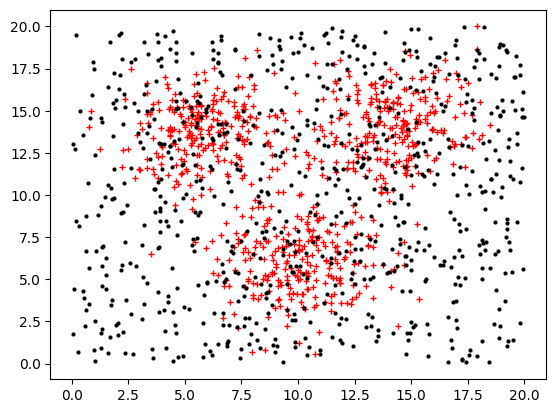

In [215]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [216]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [217]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [218]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions on the test set

y_pred = clf.predict(X_test)

# Evaluating the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualizing the Decision Tree
tree_rules = export_text(clf, feature_names=["Feature 1", "Feature 2"])
print("Decision Tree Rules:")
print(tree_rules)


Accuracy: 0.69
Decision Tree Rules:
|--- Feature 2 <= 3.20
|   |--- Feature 2 <= 2.67
|   |   |--- Feature 1 <= 8.56
|   |   |   |--- class: 0.0
|   |   |--- Feature 1 >  8.56
|   |   |   |--- Feature 1 <= 8.74
|   |   |   |   |--- class: 1.0
|   |   |   |--- Feature 1 >  8.74
|   |   |   |   |--- Feature 1 <= 10.94
|   |   |   |   |   |--- Feature 1 <= 10.73
|   |   |   |   |   |   |--- Feature 2 <= 1.14
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Feature 2 >  1.14
|   |   |   |   |   |   |   |--- Feature 2 <= 1.32
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Feature 2 >  1.32
|   |   |   |   |   |   |   |   |--- Feature 1 <= 9.69
|   |   |   |   |   |   |   |   |   |--- Feature 2 <= 1.84
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Feature 2 >  1.84
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Feature 1 >  9.69
|   |   | 

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Fitting the model

In [220]:
maxDepth=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55]

In [221]:
trainAcc=np.zeros(len(maxDepth))

In [222]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [223]:
testAcc=(np.zeros(len(maxDepth)))

In [224]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [225]:
index=0
for depth in maxDepth:
  clf=tree.DecisionTreeClassifier(max_depth=depth)

  clf=clf.fit(X_train,y_train)
  y_predTrain=clf.predict(X_train)
  y_predTest=clf.predict(X_test)
  trainAcc[index]=accuracy_score(y_train,y_predTrain)
  testAcc[index]=accuracy_score(y_test,y_predTest)
  index +=1

In [226]:
trainAcc

array([0.64416667, 0.68583333, 0.72416667, 0.72666667, 0.755     ,
       0.78      , 0.79      , 0.81583333, 0.83416667, 0.91166667,
       0.96833333, 0.99416667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [227]:
testAcc

array([0.59666667, 0.65      , 0.69666667, 0.69666667, 0.72333333,
       0.72      , 0.72      , 0.71333333, 0.71333333, 0.72666667,
       0.71      , 0.68      , 0.67666667, 0.67666667, 0.67666667,
       0.68666667, 0.68      , 0.68      ])

In [228]:
import matplotlib.pyplot as plt

In [229]:
%matplotlib inline

Text(0, 0.5, 'Accuracy')

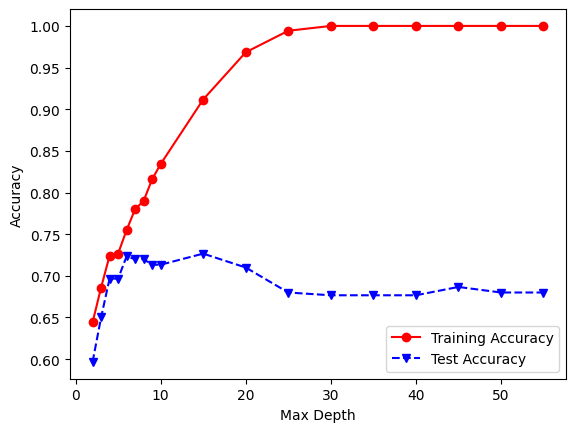

In [230]:
plt.plot(maxDepth,trainAcc,'ro-',maxDepth,testAcc,"bv--")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
